In [50]:
require 'nn'
require 'image'
label     = require 'overfeat_label'
torch.setdefaulttensortype('torch.FloatTensor')

In [51]:
net = nn.Sequential()
net:add(nn.SpatialConvolution(3, 96, 11, 11, 4, 4))
net:add(nn.ReLU())
net:add(nn.SpatialMaxPooling(2, 2, 2, 2))
net:add(nn.SpatialConvolution(96, 256, 5, 5, 1, 1))
net:add(nn.ReLU())
net:add(nn.SpatialMaxPooling(2, 2, 2, 2))
net:add(nn.SpatialConvolution(256, 512, 3, 3, 1, 1, 1, 1))
net:add(nn.ReLU())
net:add(nn.SpatialConvolution(512, 1024, 3, 3, 1, 1, 1, 1))
net:add(nn.ReLU())
net:add(nn.SpatialConvolution(1024, 1024, 3, 3, 1, 1, 1, 1))
net:add(nn.ReLU())
net:add(nn.SpatialMaxPooling(2, 2, 2, 2))
net:add(nn.SpatialConvolution(1024, 3072, 6, 6, 1, 1))
net:add(nn.ReLU())
net:add(nn.SpatialConvolution(3072, 4096, 1, 1, 1, 1))
net:add(nn.ReLU())
net:add(nn.SpatialConvolution(4096, 1000, 1, 1, 1, 1))
net:add(nn.View(1000))
net:add(nn.SpatialSoftMax())
net=torch.load('model.net')

==> prepare an input image	


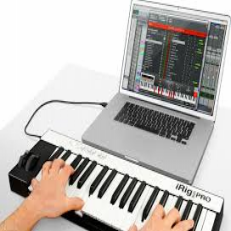

==> feed the input image	


==> Results	
1:typewriter keyboard =	0.063633538782597	
2:tape player =	0.02270264364779	
3:printer =	0.02510685287416	
4:notebook, notebook computer =	0.18225163221359	
5:space bar =	0.07998314499855	
6:radio, wireless =	0.025299943983555	
7:modem =	0.021455137059093	
8:laptop, laptop computer =	0.081121027469635	
9:computer keyboard, keypad =	0.072834074497223	
10:desktop computer =	0.3238650560379	
	
==> Top result	
desktop computer	0.3238650560379	
Time elapsed: 0.37414693832397 seconds	


In [52]:
-- load and preprocess image
print('==> prepare an input image')
img = image.load('input_img.jpg'):mul(255)
 dim = 231 or 221
img_scale = image.scale(img,dim,dim)
img=img_scale
itorch.image(img)

-- feedforward network
print('==> feed the input image')
timer = torch.Timer()
img:add(-118.380948):div(61.896913)
local out = net:forward(img)
local topN = 10
local probs, idxs = torch.topk(out, topN, 1, true)
print('==> Results')
for i=1,topN do
    print(i..":"..label[idxs[i]].." =", probs[i])
end

print('')
print('==> Top result')
local prob, idx = torch.max(out, 1)

print(label[idx:squeeze()], prob:squeeze())

print('Time elapsed: ' .. timer:time().real .. ' seconds')